In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy.visualization import quantity_support

from astropy.table import QTable 
from scipy.ndimage import shift

quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x113997a30>

In [2]:
# In Jupyterhub:
ATMOS_FILE = "/src/data/AST4310/qs006024_sap_s285.fits"
#ATMOS_FILE = "qs006024_sap_s285.fits"
atm3d = QTable.read(ATMOS_FILE)
atm3d

"temperature [256,256]","electron_density [256,256]","hydrogen_density [256,256]","velocity_z [256,256]",height,"velocity_y [256,256]","velocity_x [256,256]","pressure [256,256]"
K,1 / m3,1 / m3,m / s,m,m / s,m / s,Pa
float32,float32,float32,float32,float64,float32,float32,float32
5272.96923828125 .. 5284.5224609375,4.0828113734598656e+17 .. 4.22937661703979e+17,1.1546960635975193e+21 .. 1.1705831446017663e+21,157.57679748535156 .. 188.99781799316406,583024.0,-591.6886596679688 .. -594.4967041015625,151.15953063964844 .. 138.1940155029297,92.58880615234375 .. 94.07086181640625
5403.09130859375 .. 5411.1669921875,5.892596861260268e+17 .. 6.056246110354145e+17,1.268329059807983e+21 .. 1.2855685577065806e+21,279.1968994140625 .. 312.5419616699219,570330.6,-607.3775634765625 .. -610.0527954101562,148.22718811035156 .. 134.47979736328125,104.22808837890625 .. 105.80181884765625
5457.4619140625 .. 5460.5078125,7.130042222740767e+17 .. 7.238788733091185e+17,1.4060311220144633e+21 .. 1.4257131190234676e+21,397.9075622558594 .. 431.21435546875,557637.2000000001,-673.2451171875 .. -675.8231811523438,133.34869384765625 .. 116.03425598144531,116.7034912109375 .. 118.40267181396484
5481.47607421875 .. 5478.60009765625,8.02345177027969e+17 .. 8.032026586586808e+17,1.5645948428573422e+21 .. 1.5871253666306583e+21,493.31866455078125 .. 525.1014404296875,544943.7999999999,-847.243896484375 .. -849.96142578125,92.8567886352539 .. 66.19844055175781,130.43585205078125 .. 132.2436981201172
5437.236328125 .. 5425.58447265625,7.704930810855424e+17 .. 7.55770551670145e+17,1.7582095166500923e+21 .. 1.7849445728880238e+21,576.6238403320312 .. 605.1107177734375,532250.4,-1198.0218505859375 .. -1198.6129150390625,34.679115295410156 .. -6.235204219818115,145.38577270507812 .. 147.28074645996094
5307.6630859375 .. 5274.84521484375,6.150925743816704e+17 .. 5.789578806490563e+17,2.0056081475177378e+21 .. 2.0432271374176286e+21,639.0731811523438 .. 667.4573364257812,519557.00000000006,-1625.5244140625 .. -1612.75390625,-4.219546318054199 .. -54.43379211425781,161.87940979003906 .. 163.8760986328125
...,...,...,...,...,...,...,...
11589.94921875 .. 11593.806640625,2.6216174006864036e+22 .. 2.6315467119648488e+22,2.038237317915488e+23 .. 2.0436311891171972e+23,2663.761962890625 .. 2643.78955078125,-302254.7,361.02813720703125 .. 359.9884338378906,728.10498046875 .. 742.7396850585938,40124.42578125 .. 40248.75


In [3]:
atm3d['temperature'].shape

(75, 256, 256)

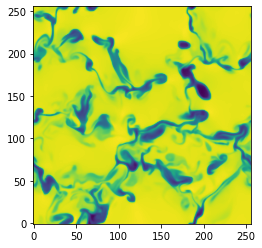

In [4]:
fig, ax = plt.subplots()
ax.imshow(atm3d['temperature'][-1].value, origin='lower');

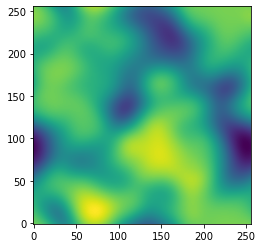

In [5]:
fig, ax = plt.subplots()
ax.imshow(atm3d['temperature'][0].value, origin='lower');

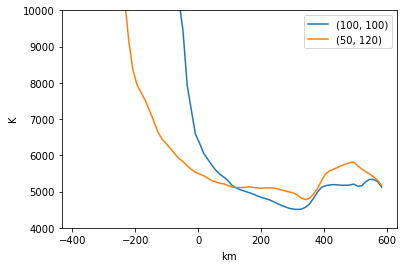

In [6]:
fig, ax = plt.subplots()
# Show columns (100, 100) and (50, 120)
ax.plot(atm3d['height'].to('km'), atm3d['temperature'][:, 100, 100],
        label='(100, 100)')
ax.plot(atm3d['height'].to('km'), atm3d['temperature'][:, 50, 120],
        label='(50, 120)')
ax.set_ylim(4000, 10000)
ax.legend();

In [7]:
numpy.argmin(numpy.abs(atm3d['height'] - 0.))

45

In [8]:
atm3d['height'][45]

<Quantity 4440.308 m>

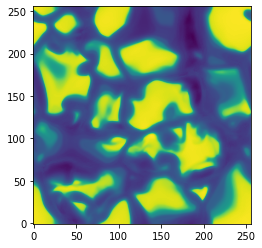

In [9]:
fig, ax = plt.subplots()
ax.imshow(atm3d['temperature'][50].value, origin='lower');

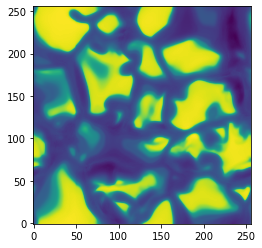

In [12]:
image = atm3d['temperature'][50].value
fig, ax = plt.subplots()
ax.imshow(shift(image, (0, 50), mode='wrap'), origin='lower');

Shifting an image that is **not** horizontally periodic:

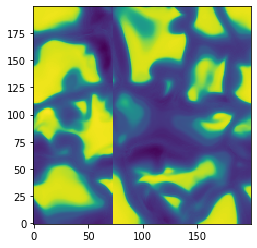

In [13]:
fig, ax = plt.subplots()
ax.imshow(shift(image[:200, :200], (0, 73), mode='wrap'), 
          origin='lower', interpolation='nearest');

zy cut, taking into account varying height scale:

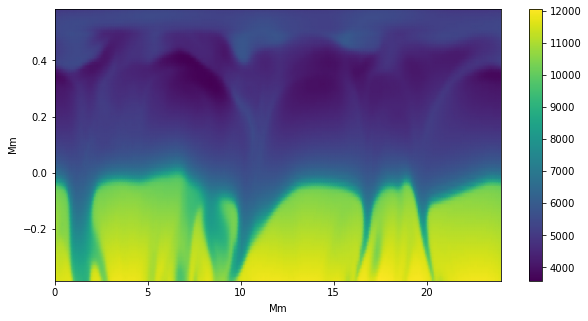

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
x = numpy.linspace(0, 24 * units.Mm, 256)
z = atm3d['height'].to('Mm')
im = ax.pcolormesh(x, z, atm3d['temperature'][:, 40], shading='gouraud');
fig.colorbar(im);

---

Scattering

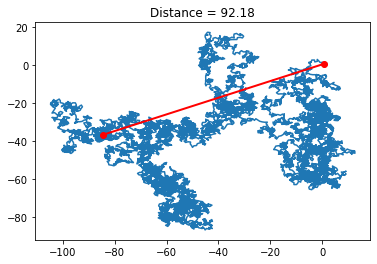

In [17]:
N = 10000
l = 1
theta = numpy.random.uniform(size=N) * 2* numpy.pi
x = numpy.cumsum(l * numpy.cos(theta))
y = numpy.cumsum(l * numpy.sin(theta))
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot([x[0], x[-1]], [y[0], y[-1]], 'ro-', lw=2)
ax.set_title("Distance = %.2f" % (numpy.sqrt(x[-1]**2 + y[-1]**2)));

In [16]:
numpy.sqrt(N) * l

100.0

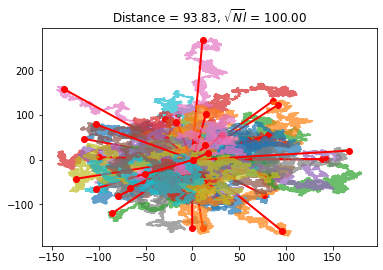

In [18]:
N = 10000
repeats = 50
fig, ax = plt.subplots()
distance = numpy.zeros(repeats)
for i in range(repeats):
    theta = numpy.random.uniform(size=N) * 2 * numpy.pi
    l = 1
    x = numpy.cumsum(l * numpy.cos(theta))
    y = numpy.cumsum(l * numpy.sin(theta))

    ax.plot(x, y, alpha=0.7)
    ax.plot([x[0], x[-1]], [y[0], y[-1]], 'ro-', lw=2)
    distance[i] = numpy.sqrt(x[-1]**2 + y[-1]**2)

ax.set_title(
    "Distance = %.2f, $\sqrt{N}l$ = %.2f" % 
    (distance.mean(), numpy.sqrt(N) * l));